## *Introduction to Neural Network Regression with TensorFlow*
> Predict a numerical variable based on some other combination of variables, even shorter...predicting a number

In [1]:
# import tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


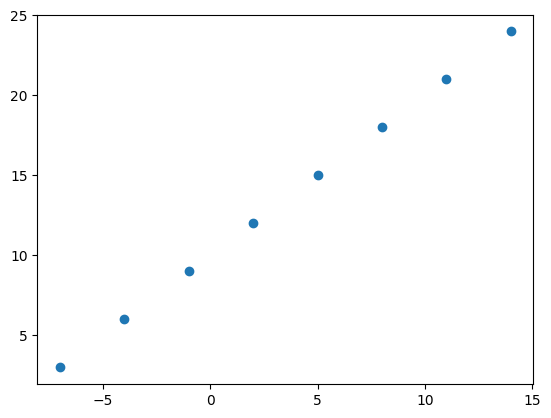

In [2]:
## Creating data to view and fit
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])
# Visualize it
plt.scatter(X,y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output Shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X[1],y[1]

(-4.0, 6.0)

In [7]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [8]:
X[0].ndim

0

In [9]:
X[0], y[0]

(-7.0, 3.0)

In [10]:
# turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape # scalars

(TensorShape([]), TensorShape([]))

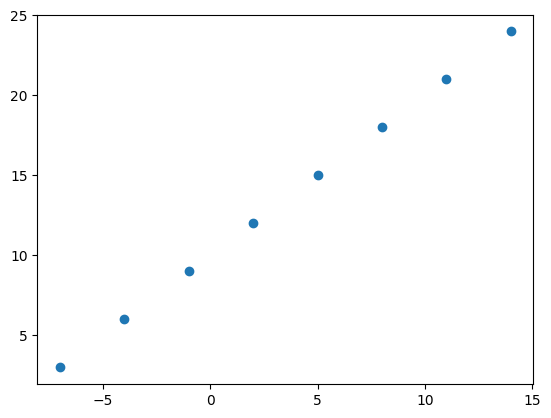

In [12]:
plt.scatter(X,y)

## Steps in modeling with TensorFlow
1. **Create a model** - define the input and output layers, as well as the
hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function, the optimizer, and evaluation metrics
3. **Fitting a model** - training data
4. **Evaluate the model** - testing data

In [13]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"]) # mean absolute error
# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=5)

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 16.5202 - mae: 16.5202
Epoch 2/5
1/1 [==============================] - 0s 34ms/step - loss: 16.2389 - mae: 16.2389
Epoch 3/5
1/1 [==============================] - 0s 18ms/step - loss: 15.9577 - mae: 15.9577
Epoch 4/5
1/1 [==============================] - 0s 36ms/step - loss: 15.6764 - mae: 15.6764
Epoch 5/5
1/1 [==============================] - 0s 23ms/step - loss: 15.3952 - mae: 15.3952


In [14]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [15]:
# Try and make a predictio with the model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 387ms/step


array([[-7.708215]], dtype=float32)

## Improving our model
We can improve our model by altering the steps we took to create the model
1. **Creating a model** - we might add more layers, increase the number of hidden units, or change the activation function of each layer
2. **Compiling a model** - we might change the optimization function or perhaps the *learning rate* of the optimization function
3. **Fitting a model** - we might fit a model for more *epochs* or on more data

In [16]:
!pwd

/content


In [17]:
# Let's rebuild our model
# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])
# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 17.8242 - mae: 17.8242
Epoch 2/100
1/1 [==============================] - 0s 26ms/step - loss: 17.5429 - mae: 17.5429
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 17.2617 - mae: 17.2617
Epoch 4/100
1/1 [==============================] - 0s 31ms/step - loss: 16.9804 - mae: 16.9804
Epoch 5/100
1/1 [==============================] - 0s 23ms/step - loss: 16.6992 - mae: 16.6992
Epoch 6/100
1/1 [==============================] - 0s 33ms/step - loss: 16.4179 - mae: 16.4179
Epoch 7/100
1/1 [==============================] - 0s 21ms/step - loss: 16.1367 - mae: 16.1367
Epoch 8/100
1/1 [==============================] - 0s 26ms/step - loss: 15.8554 - mae: 15.8554
Epoch 9/100
1/1 [==============================] - 0s 41ms/step - loss: 15.5742 - mae: 15.5742
Epoch 10/100
1/1 [==============================] - 0s 24ms/step - loss: 15.2929 - mae: 15.2929
Epoch 11/100
1/1 [==============================] -

In [18]:
# remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [19]:
# Let's see if prediction has improved
model.predict([17.0])

1/1 [==============================] - 0s 495ms/step


array([[29.389345]], dtype=float32)

In [20]:
# Let's rebuild our model
# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])
# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 13.8456 - mae: 13.8456
Epoch 2/100
1/1 [==============================] - 0s 45ms/step - loss: 11.2188 - mae: 11.2188
Epoch 3/100
1/1 [==============================] - 0s 43ms/step - loss: 9.1314 - mae: 9.1314
Epoch 4/100
1/1 [==============================] - 0s 95ms/step - loss: 7.1809 - mae: 7.1809
Epoch 5/100
1/1 [==============================] - 0s 30ms/step - loss: 4.8906 - mae: 4.8906
Epoch 6/100
1/1 [==============================] - 0s 35ms/step - loss: 4.1985 - mae: 4.1985
Epoch 7/100
1/1 [==============================] - 0s 28ms/step - loss: 5.4887 - mae: 5.4887
Epoch 8/100
1/1 [==============================] - 0s 24ms/step - loss: 6.1774 - mae: 6.1774
Epoch 9/100
1/1 [==============================] - 0s 31ms/step - loss: 6.2555 - mae: 6.2555
Epoch 10/100
1/1 [==============================] - 0s 22ms/step - loss: 5.7530 - mae: 5.7530
Epoch 11/100
1/1 [==============================] - 0s 20ms/step - 

In [21]:
model.predict([17.0]) # overfitting

1/1 [==============================] - 0s 307ms/step


array([[24.674839]], dtype=float32)

In [22]:
# Learning rate is one of the most important hyperparameters!!!

## Evaluating a Model


When it comes to evaluation... there are 3 words you should memorize:
> "Visualize, visualize, visualize"
It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* the training of the mdoel - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [23]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [24]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

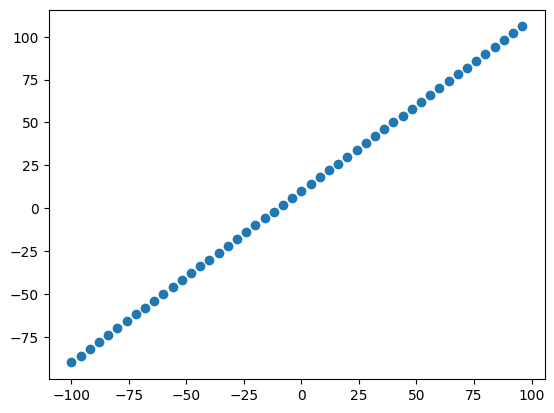

In [25]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

### The 3 sets...
* **Training set** - the model learns from this data 70-80%
* **Validation set** - model gets tuned on this data 10-15%
* **Test set** - model gets evaluated on this data 10-15%

In [26]:
# Check the length of how many samples we have
len(X)

50

In [27]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of data)
X_test = X[40:]
y_train = y[:40]
y_test = y[40:]
len(X_train), len(X_test)

(40, 10)

### Visualizing the data
Now we've got our data in training and test sets

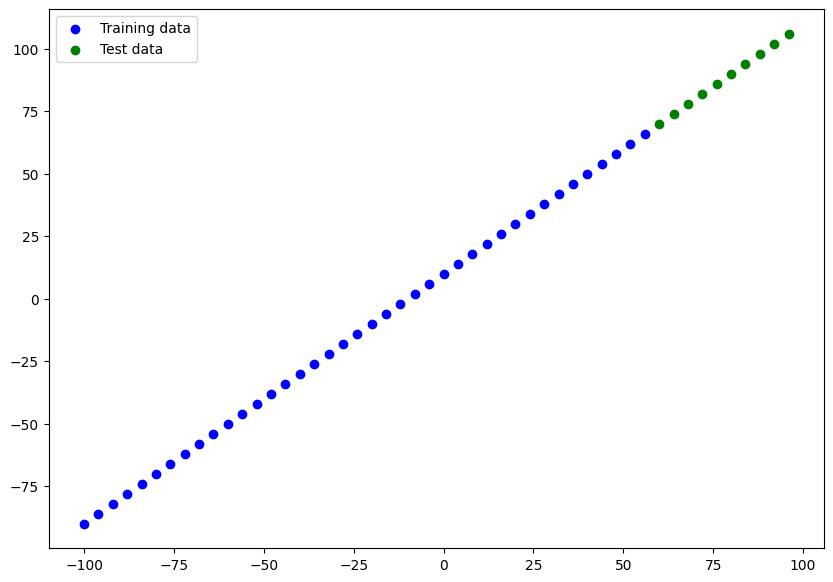

In [28]:
plt.figure(figsize=(10,7))
# Plot training data in blud
plt.scatter(X_train,y_train,c='b', label= "Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g",label="Test data")
plt.legend()

In [29]:
# How to build NN for our data
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


## Visualizing the model

In [30]:
X_train.ndim

1

In [31]:
# Let's create a model which builds automatically by defining the input shape of the first layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation = 'relu', input_shape = [1] ,name='input_layer'),
    tf.keras.layers.Dense(1, name = 'output_layer')
  ], name = 'first_model'
)
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["mae"])

In [32]:
model.summary()

Model: "first_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 50)                100       
                                                                 
 output_layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model
* Trainable parameters - these are the parameters (patterns); weights & biases
* Non-trainable params - these parameters aren't updated during training; typical of *transfer learning*

In [33]:
# Train model
model.fit(X_train,y_train, epochs=100,verbose=0)

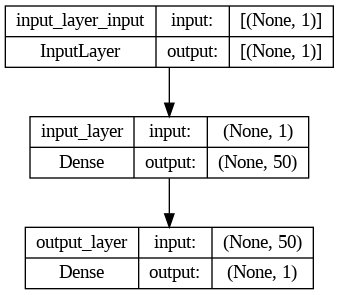

In [34]:
from tensorflow.keras.utils import plot_model
plot_model(model = model, show_shapes = True)

### Visualizing models Predictions
To visualize predictions, plot them against the truth labels

`y_test` or `y_true` vs `y_pred`

In [35]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 76ms/step


array([[ 74.65376 ],
       [ 79.56395 ],
       [ 84.474144],
       [ 89.38433 ],
       [ 94.29451 ],
       [ 99.2047  ],
       [104.115105],
       [109.02558 ],
       [113.93607 ],
       [118.84725 ]], dtype=float32)

In [36]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [37]:
# Create a plotting function because will likely use again in future
def plot_predictions(train_data = X_train, train_labels= y_train,
                     test_data = X_test, test_labels = y_test, predictions = y_pred):
  """
  Plots training data, test data and compares predictions to true labels
  """
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", label= "Training data")
  plt.scatter(test_data, test_labels, c= 'g', label = "Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c='r', label= "Predictions")
  # Show legend()
  plt.legend()


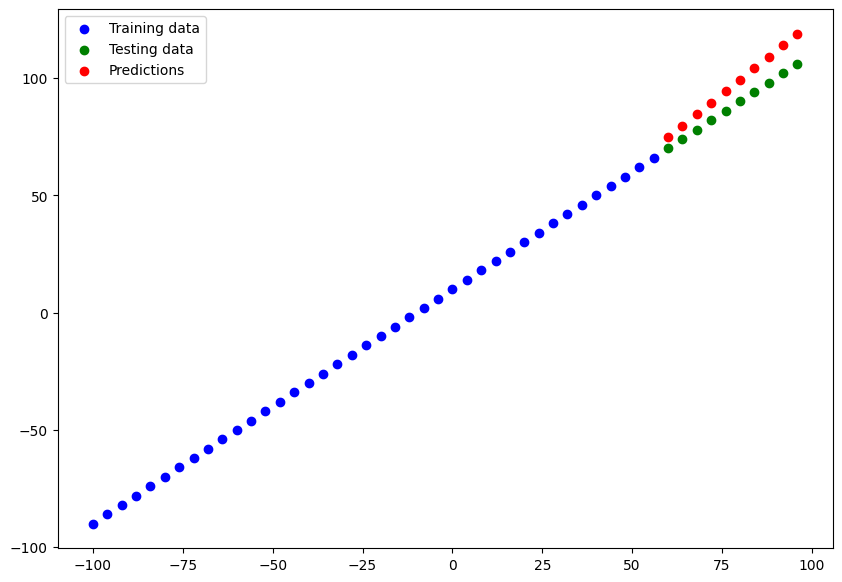

In [38]:
plot_predictions()

### Evaluating our model's predictions with regression evaluation metrics

> Regression metrics:
* MAE - mean absolution error L1 norm
* MSE - mean square error L2 norm

In [39]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 74.65376 ,  79.56395 ,  84.474144,  89.38433 ,  94.29451 ,
        99.2047  , 104.115105, 109.02558 , 113.93607 , 118.84725 ],
      dtype=float32)>

In [40]:
mae = tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_pred))
mse = tf.metrics.mean_squared_error(y_test,tf.squeeze(y_pred))
print("MAE: %.3f\t MSE: %.3f" % (mae, mse))

MAE: 8.750	 MSE: 83.398


In [41]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true,tf.squeeze(y_pred))
def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true,tf.squeeze(y_pred))



### Running experiments to improve our model
```
Build model-> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> ...
```
1. Get more data - more training data
2. Make your model larger (using more complex model) e.g. more units and/or more layers
3. Train for longer - epochs

Let's do 3 modelling experiments:
1. `model_1` - same as original model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build** `model_1`

In [42]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [43]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=['mae'])
model_1.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 40.0105 - mae: 40.0105
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 11.6259 - mae: 11.6259
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 11.6382 - mae: 11.6382
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.3754 - mae: 9.3754
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.2541 - mae: 10.2541
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.5076 - mae: 9.5076
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.6361 - mae: 8.6361
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 9.0576 - mae: 9.0576
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 18.9008 - mae: 18.9008
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 10.2031 - mae: 10.2031
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - 

1/1 [==============================] - 0s 54ms/step


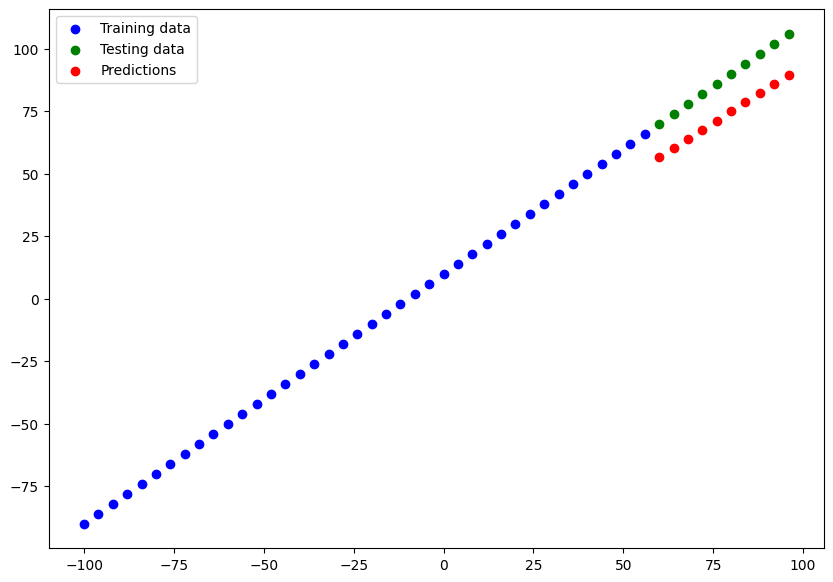

In [44]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions = y_preds_1)

In [45]:
# Calculate model_1 evalutation metrics
mae_1 = mae(y_test, tf.squeeze(y_preds_1))
mse_1 = mse(y_test, tf.squeeze(y_preds_1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=14.880697>,
 <tf.Tensor: shape=(), dtype=float32, numpy=222.26163>)

**Build `model_2`**
* 2 dense layers, trained for 100 epochs

In [48]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.SGD(),
                 metrics=["mse"])
model_2.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100)


Epoch 1/100
2/2 [==============================] - 1s 25ms/step - loss: 53.5120 - mse: 4363.8364
Epoch 2/100
2/2 [==============================] - 0s 16ms/step - loss: 24.8833 - mse: 972.1051
Epoch 3/100
2/2 [==============================] - 0s 13ms/step - loss: 18.0121 - mse: 470.5211
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 13.2168 - mse: 229.3525
Epoch 5/100
2/2 [==============================] - 0s 13ms/step - loss: 14.5605 - mse: 262.3773
Epoch 6/100
2/2 [==============================] - 0s 17ms/step - loss: 11.6099 - mse: 155.8584
Epoch 7/100
2/2 [==============================] - 0s 16ms/step - loss: 12.6625 - mse: 214.9868
Epoch 8/100
2/2 [==============================] - 0s 15ms/step - loss: 11.0389 - mse: 150.7897
Epoch 9/100
2/2 [==============================] - 0s 17ms/step - loss: 39.6476 - mse: 2463.5710
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 27.1445 - mse: 1036.6929
Epoch 11/100
2/2 [==================

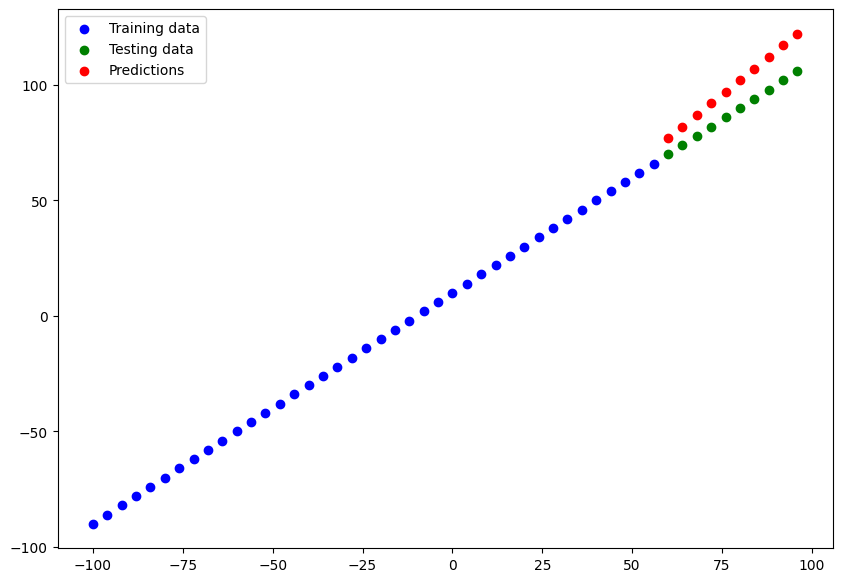

In [51]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions = y_preds_2)

In [53]:
# calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2
import torch

(<tf.Tensor: shape=(), dtype=float32, numpy=11.60189>,
 <tf.Tensor: shape=(), dtype=float32, numpy=143.203>)

**Build `model_3`**
* 2 layers, trained for 500 epochs

In [55]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])
model_3.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs = 500)

Epoch 1/500
2/2 [==============================] - 1s 11ms/step - loss: 33.5438 - mae: 33.5438
Epoch 2/500
2/2 [==============================] - 0s 13ms/step - loss: 27.8860 - mae: 27.8860
Epoch 3/500
2/2 [==============================] - 0s 11ms/step - loss: 31.1905 - mae: 31.1905
Epoch 4/500
2/2 [==============================] - 0s 14ms/step - loss: 16.4038 - mae: 16.4038
Epoch 5/500
2/2 [==============================] - 0s 23ms/step - loss: 22.0469 - mae: 22.0469
Epoch 6/500
2/2 [==============================] - 0s 14ms/step - loss: 12.0489 - mae: 12.0489
Epoch 7/500
2/2 [==============================] - 0s 17ms/step - loss: 13.2043 - mae: 13.2043
Epoch 8/500
2/2 [==============================] - 0s 15ms/step - loss: 11.2714 - mae: 11.2714
Epoch 9/500
2/2 [==============================] - 0s 11ms/step - loss: 42.0898 - mae: 42.0898
Epoch 10/500
2/2 [==============================] - 0s 20ms/step - loss: 29.2755 - mae: 29.2755
Epoch 11/500
2/2 [==============================]

1/1 [==============================] - 0s 66ms/step


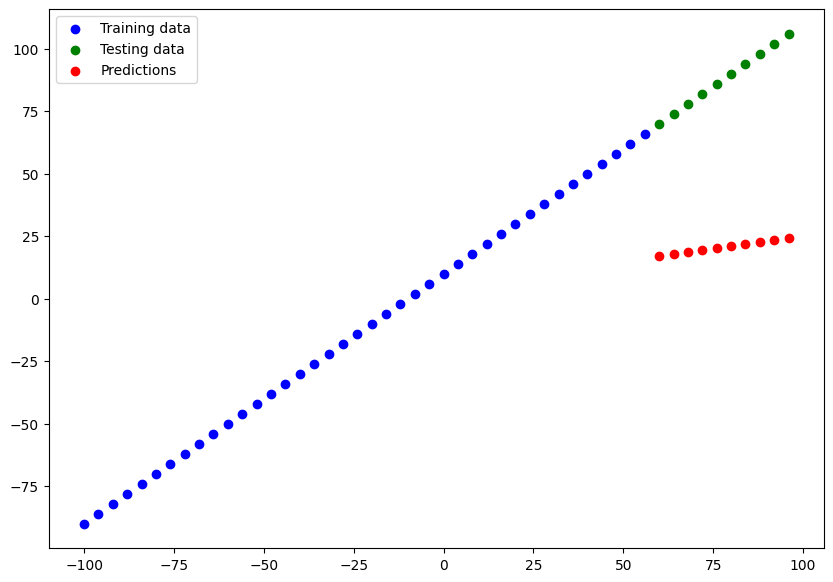

In [56]:
# Make and plot some predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [57]:
# Calculate model_3 eval metrics
mae_3 = mae(y_test,y_preds_3)
mse_3 = mse(y_test,y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.305626>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4613.0234>)

## Comparing results of our experiments


In [59]:
# Let's compare our models results using a pandas dataframe
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns = ["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,14.880697,222.261627
1,model_2,11.601890,143.203003
2,model_3,67.305626,4613.023438


In [61]:
# Looks like model 2 performed best
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Tracking your experiments

Tools to help:

📕 **Resource:** As you build more models, you'll want to look into using:
* TensorBoard - a compenent of the TF library to help track modelling experiments
* Weights & Biases - tracking all kinds of experiments (plugs straight into TensorBoard



## Saving Models

Allows us to use them outside of Goggle Colab such as web app or system

Two formats:
1. The SavedModel format
2. The HDF5 format

In [62]:
# Using savedmodel format (staying within TF)
model_2.save("best_model_SavedModel_format")

In [64]:
# HDF5 format (passing model to other apps/lang/code)
model_2.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading in a saved model

In [66]:
# Load in the SavedModel format model
loaded_SaveModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SaveModel_format.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [69]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SaveModel_format_preds = loaded_SaveModel_format.predict(X_test)
model_2_preds == loaded_SaveModel_format_preds


1/1 [==============================] - 0s 20ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [70]:
# Load in a model using the .hf format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 100ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Dowload a model (or any other file from Google Colab)

1. "files" tab, right click, click "download"
2. Use code (see cell below)
3. Use Google Drive
4. Use Git/Github

In [74]:
# Download file from Google Colab
#from google.colab import files
#files.download("/content/best_model_HDF5_format.h5")

## A larger example

In [75]:
X_train, y_train # relatively small datasets

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [76]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [83]:
# Now Dataframe is purely numeric!!
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [86]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges",axis=1)
y = insurance_one_hot["charges"]


In [90]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
len(X), len(X_train), len(X_test)


(1338, 1070, 268)

In [93]:
# Build a neural network
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"])

insurance_model.fit(X_train,y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8547.5361 - mae: 8547.5361
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7885.4058 - mae: 7885.4058
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7587.8633 - mae: 7587.8633
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7580.4512 - mae: 7580.4512
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7736.1587 - mae: 7736.1587
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7657.2412 - mae: 7657.2412
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7522.6729 - mae: 7522.6729
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7762.2510 - mae: 7762.2510
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7546.3232 - mae: 7546.3232
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7747.7075 - mae: 7747.7075

In [94]:
# Check the results of the insurance model on test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8769.8301 - mae: 8769.8301


[8769.830078125, 8769.830078125]

In [100]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Model isn't performing to well. Let's try to improve it

In [101]:
# Let's try to improve by running 2 experiments:
# Add extra layer with more hidden units
# Train for longer

In [105]:
# Set random seed
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])
insurance_model_2.fit(X_train, y_train, epochs = 100, verbose = 0)

In [107]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4797.8887 - mae: 4797.8887


[4797.888671875, 4797.888671875]

In [108]:
# Set random seed
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics=["mae"])

history = insurance_model_3.fit(X_train,y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 3s 6ms/step - loss: 13300.9404 - mae: 13300.9404
Epoch 2/200
34/34 [==============================] - 0s 5ms/step - loss: 13145.4922 - mae: 13145.4922
Epoch 3/200
34/34 [==============================] - 0s 7ms/step - loss: 12816.8887 - mae: 12816.8887
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 12162.6357 - mae: 12162.6357
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 11047.9580 - mae: 11047.9580
Epoch 6/200
34/34 [==============================] - 0s 5ms/step - loss: 9582.4717 - mae: 9582.4717
Epoch 7/200
34/34 [==============================] - 0s 8ms/step - loss: 8212.0859 - mae: 8212.0859
Epoch 8/200
34/34 [==============================] - 0s 9ms/step - loss: 7523.5317 - mae: 7523.5317
Epoch 9/200
34/34 [==============================] - 0s 5ms/step - loss: 7407.0352 - mae: 7407.0352
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7387.0151 - mae:

In [109]:
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3503.4817 - mae: 3503.4817


[3503.481689453125, 3503.481689453125]

Text(0.5, 0, 'epochs')

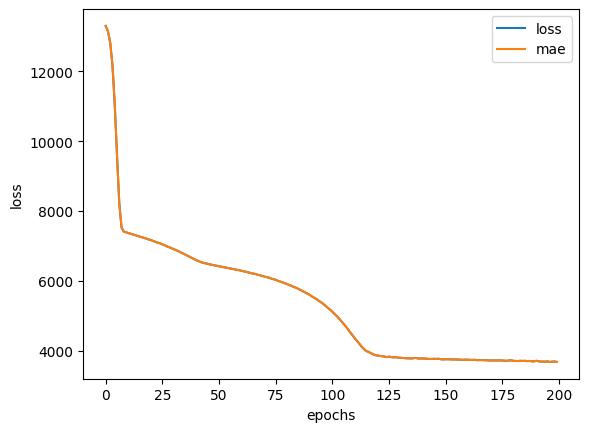

In [110]:
# Plot history (also known as loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Preprocessing data (normalization and standardization)

In [111]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [115]:
# Borrow classes from Scikit-Learn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
# Create a column transformer
ct = make_column_transformer(
 (MinMaxScaler(), ["age","bmi","children"]),
 (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)
# Create X & y
X = insurance.drop("charges",axis=1)
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [116]:
# What does data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [118]:
X_train_normal[0] # all values [0, 1]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [120]:
X_train.shape, X_train_normal.shape # Columns added b/c of OneHotEncoding

((1070, 6), (1070, 11))

Let's build neural network model on our normalized data

In [121]:
tf.random.set_seed(42)

model_normal = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_normal.compile(loss = tf.keras.losses.mae,
                     optimizer = tf.keras.optimizers.Adam(),
                     metrics = ["mae"])

model_normal.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 5ms/step - loss: 13343.3389 - mae: 13343.3389
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13333.1240 - mae: 13333.1240
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 13308.0186 - mae: 13308.0186
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13257.0469 - mae: 13257.0469
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13169.5586 - mae: 13169.5586
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13035.2422 - mae: 13035.2422
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 12843.9922 - mae: 12843.9922
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 12585.5830 - mae: 12585.5830
Epoch 9/100
34/34 [==============================] - 0s 7ms/step - loss: 12249.9287 - mae: 12249.9287
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 11835.57

In [122]:
model_normal.evaluate(X_test_normal, y_test)

9/9 [==============================] - 1s 6ms/step - loss: 3441.2407 - mae: 3441.2407


[3441.24072265625, 3441.24072265625]

In [124]:
# insurance_model_2 w/o normalization
# 9/9 [==============================] - 0s 3ms/step - loss: 4797.8887 - mae: 4797.8887
# mae improved with normalization!
# Gradient descent happens faster with feature scaling/normalization